In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nilearn
import numpy as np
from nilearn import datasets, plotting
from sklearn.feature_selection import SelectPercentile, f_classif

In [2]:
ASD_NEGATIVE = 1
ASD_POSITIVE = 2

In [3]:
cg_mean, cg_std = np.loadtxt('./results/beta_optimization').T
g_mean, g_std = np.loadtxt('./results/beta_optimization_gd.csv').T
l = 20
betas = np.linspace(0, 2, 50)
g_mean = g_mean[:l]
g_std = g_std[:l]
betas = betas[:l]

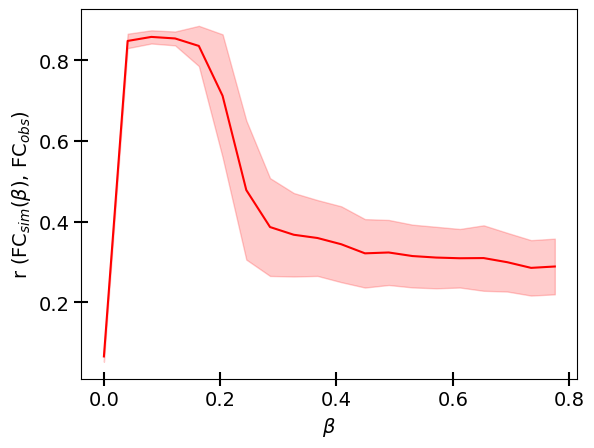

In [4]:
# plt.plot(betas, cg_mean, color='gray', label = 'Conjugate Gradient Descent')
# plt.fill_between(betas, cg_mean - cg_std, cg_mean + cg_std, color='gray', alpha=0.2)
plt.plot(betas, g_mean, color='red', label = 'Gradient Descent')
plt.fill_between(betas, g_mean - g_std, g_mean + g_std, color='red', alpha=0.2)
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'r (FC$_{sim}(\beta)$, FC$_{obs}$)', fontsize=14)
# plt.legend()
plt.tick_params(axis='both', which='major', direction='inout', length = 10, width = 1.5, labelsize='14')

In [5]:
betas

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

In [6]:
a = np.random.uniform(0, 1, size=(196, 0))

In [11]:
def top_pairs(scores, coordinates, n_rois = 116, k = 5):
    idx = np.argsort(scores)[-k:]
    rois = set() 
    pairs = set()
    rois_scores = {}
    for i in idx:
        r1 = i//n_rois
        r2 = i%n_rois
        rois.add(r1)
        rois.add(r2)
        pairs.add((r1, r2, scores[i]))
        rois_scores[r1] = scores[i]
        rois_scores[r2] = scores[i]

    rois = list(rois)
    coordinates = coordinates[rois]
    scores = scores.reshape(n_rois, n_rois)[rois][:, rois]
    return coordinates, scores, rois_scores, pairs

### Loading connectivity matrices 

In [12]:
diag = np.load('../data/diag_nyu.npy')
ising_rep_ut = np.load('../data/gd_nyu.npy')
ising_rep_mat = np.reshape(ising_rep_ut, (ising_rep_ut.shape[0], 116, 116))
ising_rep = ising_rep_ut
fc_rep_ut = np.load('../data/sfc_nyu.npy')
fc_rep_mat = np.zeros((fc_rep_ut.shape[0], 116, 116))
fc_rep = np.zeros((fc_rep_ut.shape[0], 116*116))
for i in range(fc_rep_ut.shape[0]):
    fc_rep_mat[i][np.triu_indices(116, k=1)] = fc_rep_ut[i]
    fc_rep_mat[i] = np.triu(fc_rep_mat[i]) + np.tril(fc_rep_mat[i].T, k=-1)
    fc_rep[i] = fc_rep_mat[i].flatten()
print(ising_rep.shape, fc_rep.shape)
diag = np.load('../data/diag_all.npy')
fs = SelectPercentile(f_classif, percentile=10)


(167, 13456) (167, 13456)


/home/anirudh/miniconda3/envs/research/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [    0   117   234   351   468   585   702   819   936  1053  1170  1287
  1404  1521  1638  1755  1872  1989  2106  2223  2340  2457  2574  2691
  2808  2925  3042  3159  3276  3393  3510  3627  3744  3861  3978  4095
  4212  4329  4446  4563  4680  4797  4914  5031  5148  5265  5382  5499
  5616  5733  5850  5967  6084  6201  6318  6435  6552  6669  6786  6903
  7020  7137  7254  7371  7488  7605  7722  7839  7956  8073  8190  8307
  8424  8541  8658  8775  8892  9009  9126  9243  9360  9477  9594  9711
  9828  9945 10062 10179 10296 10413 10530 10647 10764 10881 10998 11115
 11232 11349 11466 11583 11700 11817 11934 12051 12168 12285 12402 12519
 12636 12753 12870 12987 13104 13221 13338 13455] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/anirudh/miniconda3/envs/research/lib/python3.9

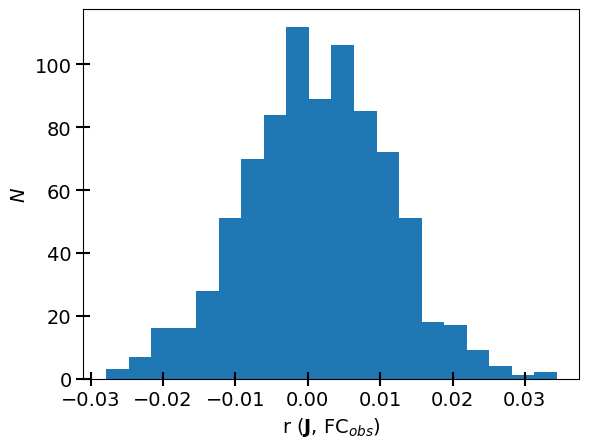

In [13]:
corrs = []
for idx in range(ising_rep.shape[0]):
    corrs.append(np.corrcoef(ising_rep[idx], fc_rep[idx])[0][1])
corrs = np.array(corrs)
plt.hist(corrs, bins=20)
plt.xlabel(r'r ($\mathbf{J}$, FC$_{obs}$)', fontsize=14)
plt.ylabel(r'$N$', fontsize=14)
# plt.legend()
plt.tick_params(axis='both', which='major', direction='inout', length = 10, width = 1.5, labelsize='14')

In [14]:
corrs.shape

(841,)

In [8]:
aal = datasets.fetch_atlas_aal()

In [15]:
ising_rep = fs.fit_transform(ising_rep, diag)
ising_scores = fs.scores_
fc_rep = fs.fit_transform(fc_rep, diag)
fc_scores = fs.scores_

## ROI Distances

In [10]:
coordinates = plotting.find_parcellation_cut_coords(aal['maps'])
roi_dists = cdist(coordinates, coordinates)

In [12]:
neg_diag_idxs = np.where(diag == ASD_NEGATIVE)[0]
pos_diag_idxs = np.where(diag == ASD_POSITIVE)[0]

In [13]:
neg_diag_fc_rep = np.mean(fc_rep_mat[neg_diag_idxs], axis=0)
pos_diag_fc_rep = np.mean(fc_rep_mat[pos_diag_idxs], axis=0)
neg_diag_ising_rep = np.mean(ising_rep_mat[neg_diag_idxs], axis=0)
pos_diag_ising_rep = np.mean(ising_rep_mat[pos_diag_idxs], axis=0)
all_fc_rep = np.mean(fc_rep_mat, axis=0)
all_ising_rep = np.mean(ising_rep_mat, axis=0)

In [14]:
def get_dist_fc_ising (fc_rep, ising_rep, roi_dists):
    x_dists, y_fc, y_ising = [], [], []
    for i in range(len(fc_rep)):
        for j in range(i+1, len(fc_rep)):
            x_dists.append(roi_dists[i][j])
            y_fc.append(fc_rep[i][j])
            y_ising.append(ising_rep[i][j])
            # print(f"y_fc: {fc_rep[i][j]}, y_ising: {ising_rep}")
    return np.array(x_dists), np.array(y_fc), np.array(y_ising)

neg_x_dists, neg_y_fc, neg_y_ising = get_dist_fc_ising(neg_diag_fc_rep, neg_diag_ising_rep, roi_dists)
pos_x_dists, pos_y_fc, pos_y_ising = get_dist_fc_ising(pos_diag_fc_rep, pos_diag_ising_rep, roi_dists)
all_x_dists, all_y_fc, all_y_ising = get_dist_fc_ising(all_fc_rep, all_ising_rep, roi_dists)

Text(0.5, 1.0, 'FC vs ROI Distance')

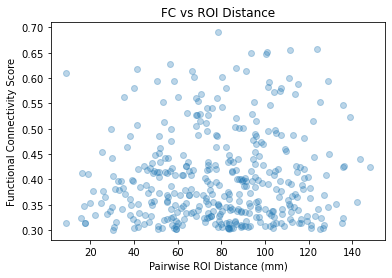

In [15]:
plt.scatter(all_x_dists[all_y_fc > 0.3], all_y_fc[all_y_fc > 0.3], alpha=0.3)
plt.xlabel("Pairwise ROI Distance (mm)")
plt.ylabel("Functional Connectivity Score")
plt.title("FC vs ROI Distance")

Text(0.5, 1.0, 'Ising Pairwise Connection vs ROI Distance for ASD-allative Group')

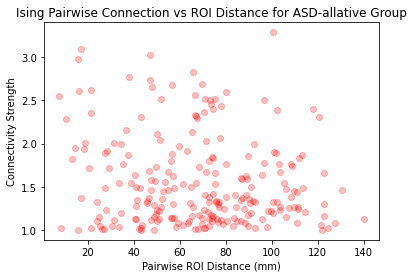

In [16]:
plt.scatter(all_x_dists[all_y_ising > 1], all_y_ising[all_y_ising > 1], alpha=0.25, color='red')
plt.plot(all_x_dists[all_y_ising > 1], np.mean(all_y_ising[all_y_ising > 1]))
plt.xlabel("Pairwise ROI Distance (mm)")
plt.ylabel("Connectivity Strength")
plt.title("Ising Pairwise Connection vs ROI Distance for ASD-allative Group")

Text(0.5, 1.0, 'FC vs ROI Distance for ASD-Negative Group')

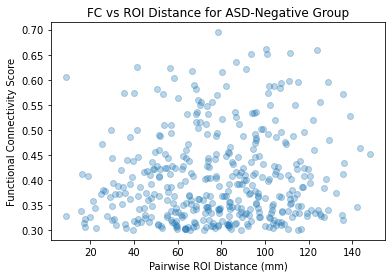

In [17]:
plt.scatter(neg_x_dists[neg_y_fc > 0.3], neg_y_fc[neg_y_fc > 0.3], alpha=0.3)
plt.xlabel("Pairwise ROI Distance (mm)")
plt.ylabel("Functional Connectivity Score")
plt.title("FC vs ROI Distance for ASD-Negative Group")

Text(0.5, 1.0, 'Ising Pairwise Connection vs ROI Distance for ASD-Negative Group')

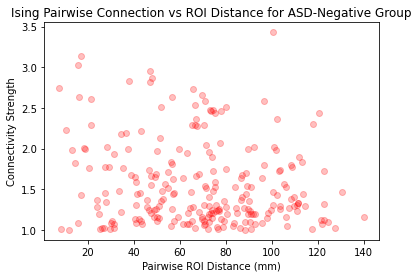

In [18]:
plt.scatter(neg_x_dists[neg_y_ising > 1], neg_y_ising[neg_y_ising > 1], alpha=0.25, color='red')
plt.xlabel("Pairwise ROI Distance (mm)")
plt.ylabel("Connectivity Strength")
plt.title("Ising Pairwise Connection vs ROI Distance for ASD-Negative Group")

Text(0.5, 1.0, 'FC vs ROI Distance for ASD-Positive Group')

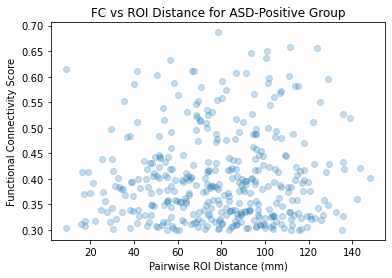

In [19]:
plt.scatter(pos_x_dists[pos_y_fc > 0.3], pos_y_fc[pos_y_fc > 0.3], alpha=0.25)
plt.xlabel("Pairwise ROI Distance (mm)")
plt.ylabel("Functional Connectivity Score")
plt.title("FC vs ROI Distance for ASD-Positive Group")

Text(0.5, 1.0, 'Ising Pairwise Connection vs ROI Distance for ASD-Positive Group')

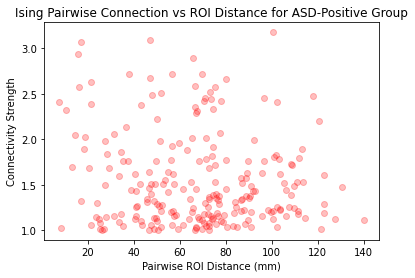

In [20]:
plt.scatter(pos_x_dists[pos_y_ising > 1], pos_y_ising[pos_y_ising > 1], alpha=0.25, color='red')
plt.xlabel("Pairwise ROI Distance (mm)")
plt.ylabel("Connectivity Strength")
plt.title("Ising Pairwise Connection vs ROI Distance for ASD-Positive Group")

In [9]:
is_coords, is_scores, is_rois, is_pairs = top_pairs(ising_scores, coordinates, k=5)
plotting.plot_connectome(is_scores, is_coords)

NameError: name 'top_pairs' is not defined

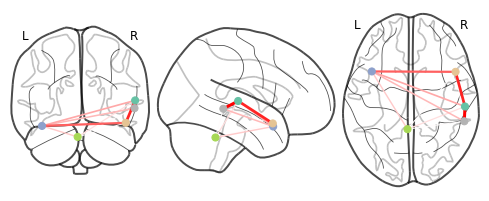

In [18]:
fc_coords, f_scores, fc_rois, fc_pairs = top_pairs(fc_scores, coordinates, k=5)
plotting.plot_connectome(f_scores, fc_coords)

In [19]:
labels = [(aal.labels[i], aal.labels[j], sc) for i, j, sc in fc_pairs]
labels

[('Frontal_Inf_Orb_L', 'Vermis_7', 37.98146452010402),
 ('Rolandic_Oper_L', 'Frontal_Mid_L', 46.401333426722246),
 ('Vermis_7', 'Frontal_Inf_Orb_L', 37.98146452010402),
 ('Frontal_Mid_L', 'Rolandic_Oper_L', 46.401333426722246),
 ('Frontal_Sup_Orb_R', 'Cerebelum_Crus1_L', 36.07735545427141)]

In [20]:
labels = [(aal.labels[i], aal.labels[j], sc) for i, j, sc in is_pairs]
labels

[('Postcentral_L', 'Lingual_L', 16.294879978747908),
 ('Parietal_Inf_L', 'Paracentral_Lobule_L', 16.208868866706624),
 ('Occipital_Mid_R', 'Calcarine_L', 16.39882224049977),
 ('Vermis_3', 'Cuneus_R', 16.01626255510945),
 ('Calcarine_L', 'Occipital_Mid_R', 17.941764124924827)] ('', '', 0)][('Frontal_Med_Orb_R', 15.062930005568164),
 ('Cingulum_Post_R', 15.062930005568164),
 ('Temporal_Pole_Mid_L', 15.395610051080535),
 ('Supp_Motor_Area_R', 15.395610051080535),
 ('Cingulum_Post_L', 18.540943487318767),
 ('Lingual_R', 18.540943487318767),
 ('Supp_Motor_Area_L', 19.368740038783237),
 ('Cerebelum_10_R', 19.368740038783237)]

## ROI Distances

In [2]:
fc_rep_ut = np.load('../data/AAL_reps/sfc_NYU.npy')
fc_rep_mat = np.zeros((fc_rep_ut.shape[0], 116, 116))
fc_rep = np.zeros((fc_rep_ut.shape[0], 116*116))
for i in range(fc_rep_ut.shape[0]):
    fc_rep_mat[i][np.triu_indices(116)] = fc_rep_ut[i]
    fc_rep_mat[i] = np.triu(fc_rep_mat[i]) + np.tril(fc_rep_mat[i].T, k=-1)
    fc_rep[i] = fc_rep_mat[i].flatten()

In [3]:
ising_rep_mat = np.load('../data/AAL_reps/ising_NYU.npy')

In [4]:
diag = np.load('../data/AAL_reps/diag_NYU.npy')

In [10]:
from scipy.spatial.distance import cdist

coordinates = plotting.find_parcellation_cut_coords(aal['maps'])
roi_dists = cdist(coordinates, coordinates)
neg_diag_idxs = np.where(diag == 0)[0]
pos_diag_idxs = np.where(diag == 1)[0]

In [11]:
neg_diag_fc_rep = np.mean(fc_rep_mat[neg_diag_idxs], axis=0)
pos_diag_fc_rep = np.mean(fc_rep_mat[pos_diag_idxs], axis=0)
neg_diag_ising_rep = np.mean(ising_rep_mat[neg_diag_idxs], axis=0)
pos_diag_ising_rep = np.mean(ising_rep_mat[pos_diag_idxs], axis=0)
all_fc_rep = np.mean(fc_rep_mat, axis=0)
all_ising_rep = np.mean(ising_rep_mat, axis=0)

In [12]:
def get_dist_fc_ising (fc_rep, ising_rep, roi_dists):
    x_dists, y_fc, y_ising = [], [], []
    for i in range(len(fc_rep)):
        for j in range(i+1, len(fc_rep)):
            x_dists.append(roi_dists[i][j])
            y_fc.append(fc_rep[i][j])
            y_ising.append(ising_rep[i][j])
            # print(f"y_fc: {fc_rep[i][j]}, y_ising: {ising_rep}")
    y_fc = np.array(y_fc)
    y_fc[np.isnan(y_fc)] = 0
    return np.array(x_dists), np.array(y_fc), np.array(y_ising)

neg_x_dists, neg_y_fc, neg_y_ising = get_dist_fc_ising(neg_diag_fc_rep, neg_diag_ising_rep, roi_dists)
pos_x_dists, pos_y_fc, pos_y_ising = get_dist_fc_ising(pos_diag_fc_rep, pos_diag_ising_rep, roi_dists)
all_x_dists, all_y_fc, all_y_ising = get_dist_fc_ising(all_fc_rep, all_ising_rep, roi_dists)

Text(0.5, 1.0, 'FC vs ROI Distance')

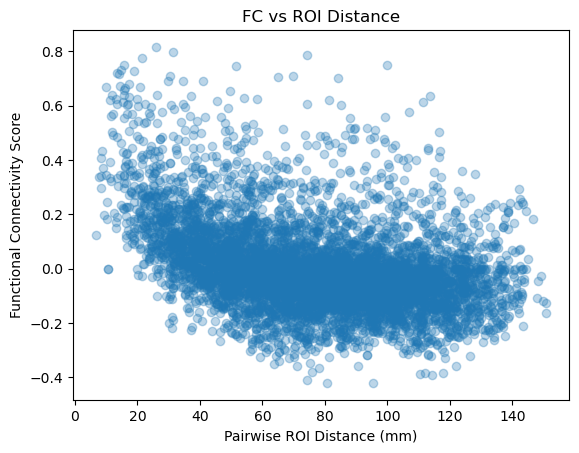

In [13]:

plt.scatter(all_x_dists, all_y_fc, alpha=0.3)
plt.xlabel("Pairwise ROI Distance (mm)")
plt.ylabel("Functional Connectivity Score")
plt.title("FC vs ROI Distance")

Text(0.5, 1.0, 'Ising Pairwise Connection vs ROI Distance for ASD-allative Group')

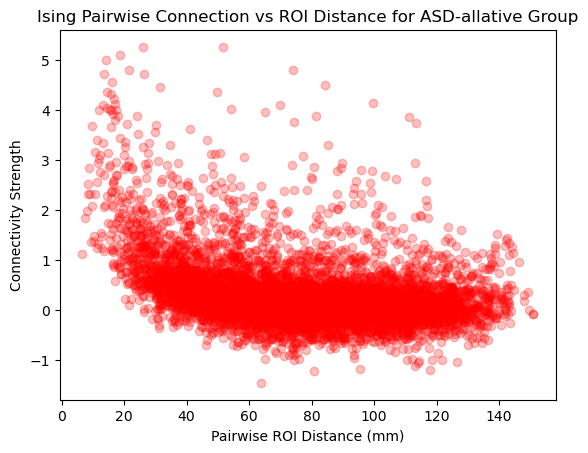

In [14]:
plt.scatter(all_x_dists, all_y_ising, alpha=0.25, color='red')
# plt.plot(all_x_dists[all_y_ising > 1], np.mean(all_y_ising[all_y_ising > 1]))
plt.xlabel("Pairwise ROI Distance (mm)")
plt.ylabel("Connectivity Strength")
plt.title("Ising Pairwise Connection vs ROI Distance for ASD-allative Group")

In [15]:
def binned_mean(x, y, n_bins = 10):
    y = (y - np.mean(y))/np.std(y)
    x_binned = np.linspace(0, max(x), n_bins)
    data = []
    binz = {i: [] for i in range(len(x_binned))}
    for idx, i in enumerate(y):
        j = 0
        for v in x_binned: 
            if x[idx] <= v:
                break
            j+=1
        binz[j].append(y[idx])
    conn_mean = np.array([np.mean(i) for i in binz.values()])
    conn_std = np.array([np.std(i) for i in binz.values()]) 
    return x_binned, conn_mean, conn_std

In [16]:
x, fc_mean, fc_std = binned_mean(all_x_dists, all_y_fc)
x, ising_mean, ising_std = binned_mean(all_x_dists, all_y_ising)

/home/shivansh/miniconda3/envs/neuro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shivansh/miniconda3/envs/neuro/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shivansh/miniconda3/envs/neuro/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shivansh/miniconda3/envs/neuro/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/shivansh/miniconda3/envs/neuro/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


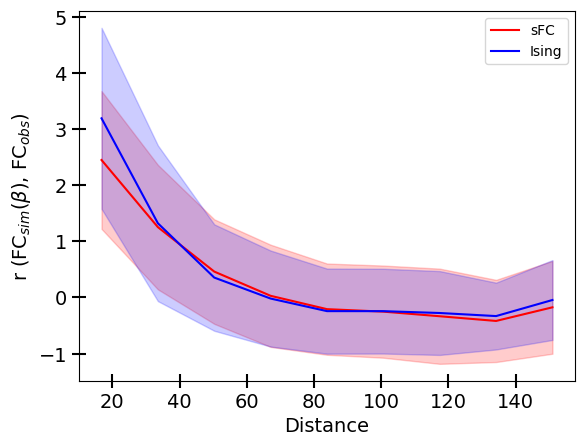

In [17]:
plt.plot(x, fc_mean, color='red', label = 'sFC')
plt.fill_between(x, fc_mean - fc_std, fc_mean + fc_std, color='red', alpha=0.2)
plt.plot(x, ising_mean, color='blue', label = 'Ising')
plt.fill_between(x, ising_mean - ising_std, ising_mean + ising_std, color='blue', alpha=0.2)
plt.xlabel(r'Distance', fontsize=14)
plt.ylabel(r'r (FC$_{sim}(\beta)$, FC$_{obs}$)', fontsize=14)
plt.legend()
plt.tick_params(axis='both', which='major', direction='inout', length = 10, width = 1.5, labelsize='14')

array([        nan,  0.38439539,  0.19693873,  0.07285193,  0.00522127,
       -0.0320483 , -0.03897089, -0.05182971, -0.06495436, -0.02689531])